In [1]:
import pandas as pd


In [2]:
!pip install pandas-datareader

In [3]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()
print(start, end)

2012-01-01 00:00:00 2021-09-29 12:12:14.178876


In [8]:
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA", "GOOGL", "AMZN", "NFLX", "WMT", "TGT" ]
for key in stocks:
 data_dict[key] = web.DataReader(key, 'yahoo', start, end)
data_dict

{'MSFT':                   High         Low        Open       Close      Volume  \
 Date                                                                     
 2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
 2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
 2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
 2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
 2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
 ...                ...         ...         ...         ...         ...   
 2021-09-23  300.899994  297.529999  298.850006  299.559998  18604600.0   
 2021-09-24  299.799988  296.929993  298.230011  299.350006  14994200.0   
 2021-09-27  296.470001  292.940002  296.140015  294.170013  23571700.0   
 2021-09-28  290.779999  282.750000  289.799988  283.519989  43139400.0   
 2021-09-29  286.679993  283.010010  285.100006  284.309998  14958083.0   
 
              A

In [11]:
print(key +" Closing Price")
data_dict[key]

TGT Closing Price


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,51.910000,50.770000,51.889999,51.119999,7627900.0,38.849899
2012-01-04,51.230000,49.549999,51.049999,50.000000,14091600.0,37.998726
2012-01-05,48.779999,47.250000,48.000000,48.509998,19509400.0,36.866352
2012-01-06,49.560001,48.480000,48.810001,48.950001,12595700.0,37.200741
2012-01-09,49.020000,48.279999,49.020000,48.570000,6795300.0,36.911964
...,...,...,...,...,...,...
2021-09-23,245.169998,242.440002,243.500000,242.669998,2038600.0,242.669998
2021-09-24,242.809998,240.380005,241.330002,241.440002,1900400.0,241.440002
2021-09-27,242.339996,237.869995,240.250000,238.580002,2588400.0,238.580002


In [12]:
data_dict.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA', 'GOOGL', 'AMZN', 'NFLX', 'WMT', 'TGT'])

In [13]:

close_data = pd.concat((df["Close"] for df in data_dict.values()), 
                       keys = data_dict.keys(),
                        axis = 1)
close_data

,MSFT,AAPL,FB,TSLA,GOOGL,AMZN,NFLX,WMT,TGT
Date,,,,,,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000,333.038025,179.029999,10.320000,60.330002,51.119999
2012-01-04,27.400000,14.765714,NaN,5.542000,334.474487,177.509995,11.492857,59.709999,50.000000
2012-01-05,27.680000,14.929643,NaN,5.424000,329.834839,177.610001,11.328571,59.419998,48.509998
2012-01-06,28.110001,15.085714,NaN,5.382000,325.335327,182.610001,12.327143,59.000000,48.950001
2012-01-09,27.740000,15.061786,NaN,5.450000,311.541534,178.559998,14.025714,59.180000,48.570000
...,...,...,...,...,...,...,...,...,...
2021-09-23,299.559998,146.830002,345.959991,753.640015,2824.320068,3416.000000,593.260010,142.770004,242.669998
2021-09-24,299.350006,146.919998,352.959991,774.390015,2844.300049,3425.520020,592.390015,143.169998,241.440002
2021-09-27,294.170013,145.369995,353.579987,791.359985,2821.439941,3405.800049,592.640015,142.250000,238.580002


Text(0.5, 1.0, 'Close\nDaily Stock Prices')

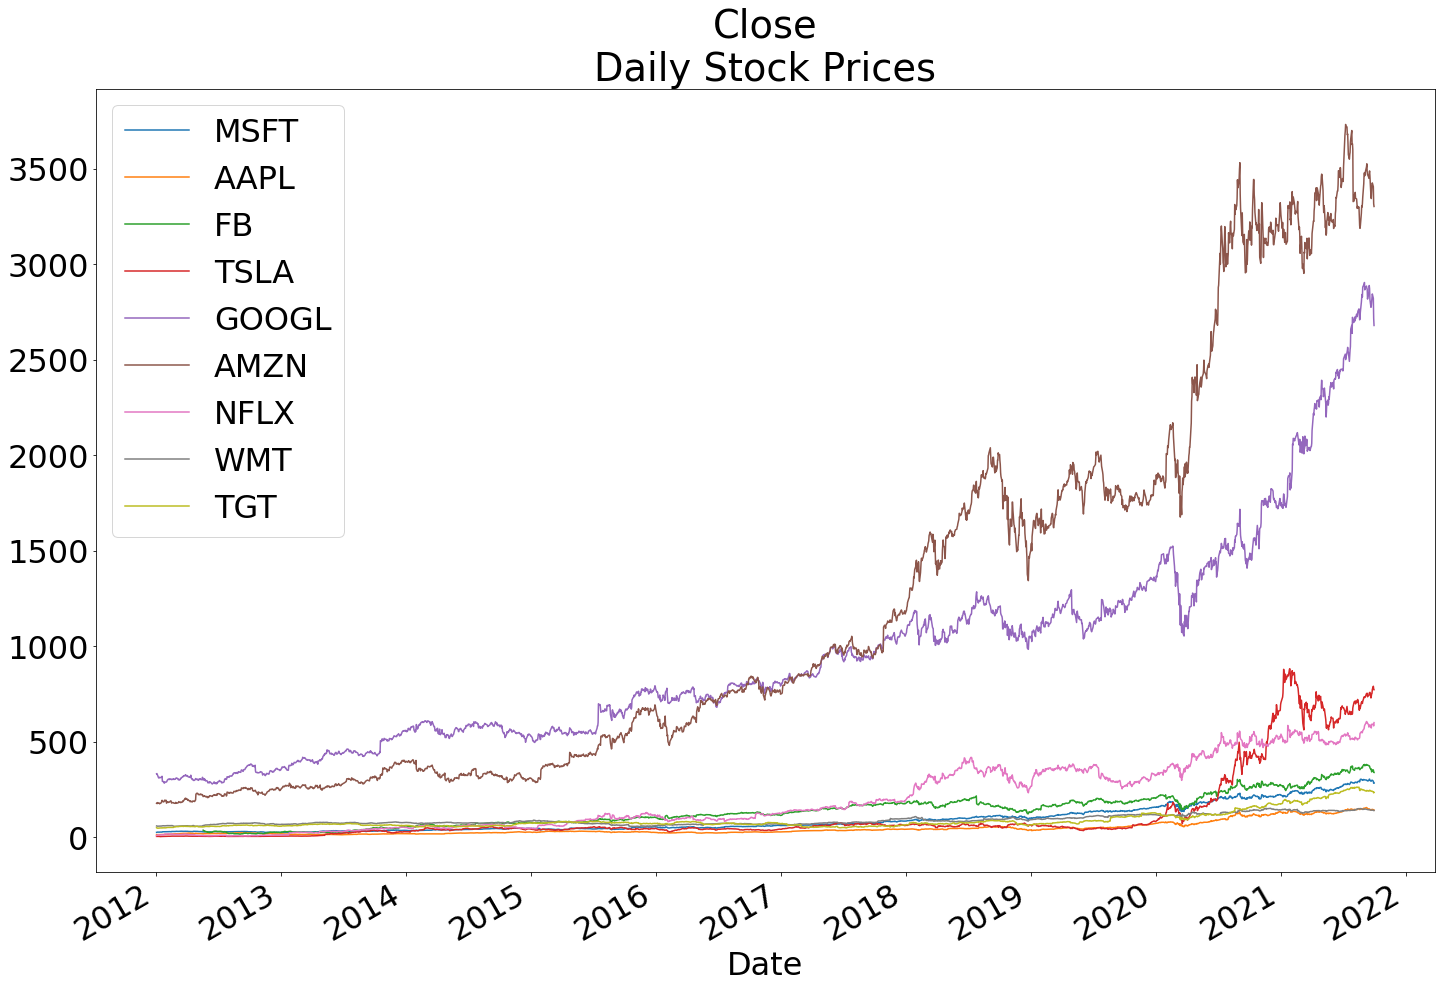

In [14]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
plt.title("Close\nDaily Stock Prices")

<ipython-input-15-0eb7047172d3>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000'),
 Text(0, 100000.0, '100000')]

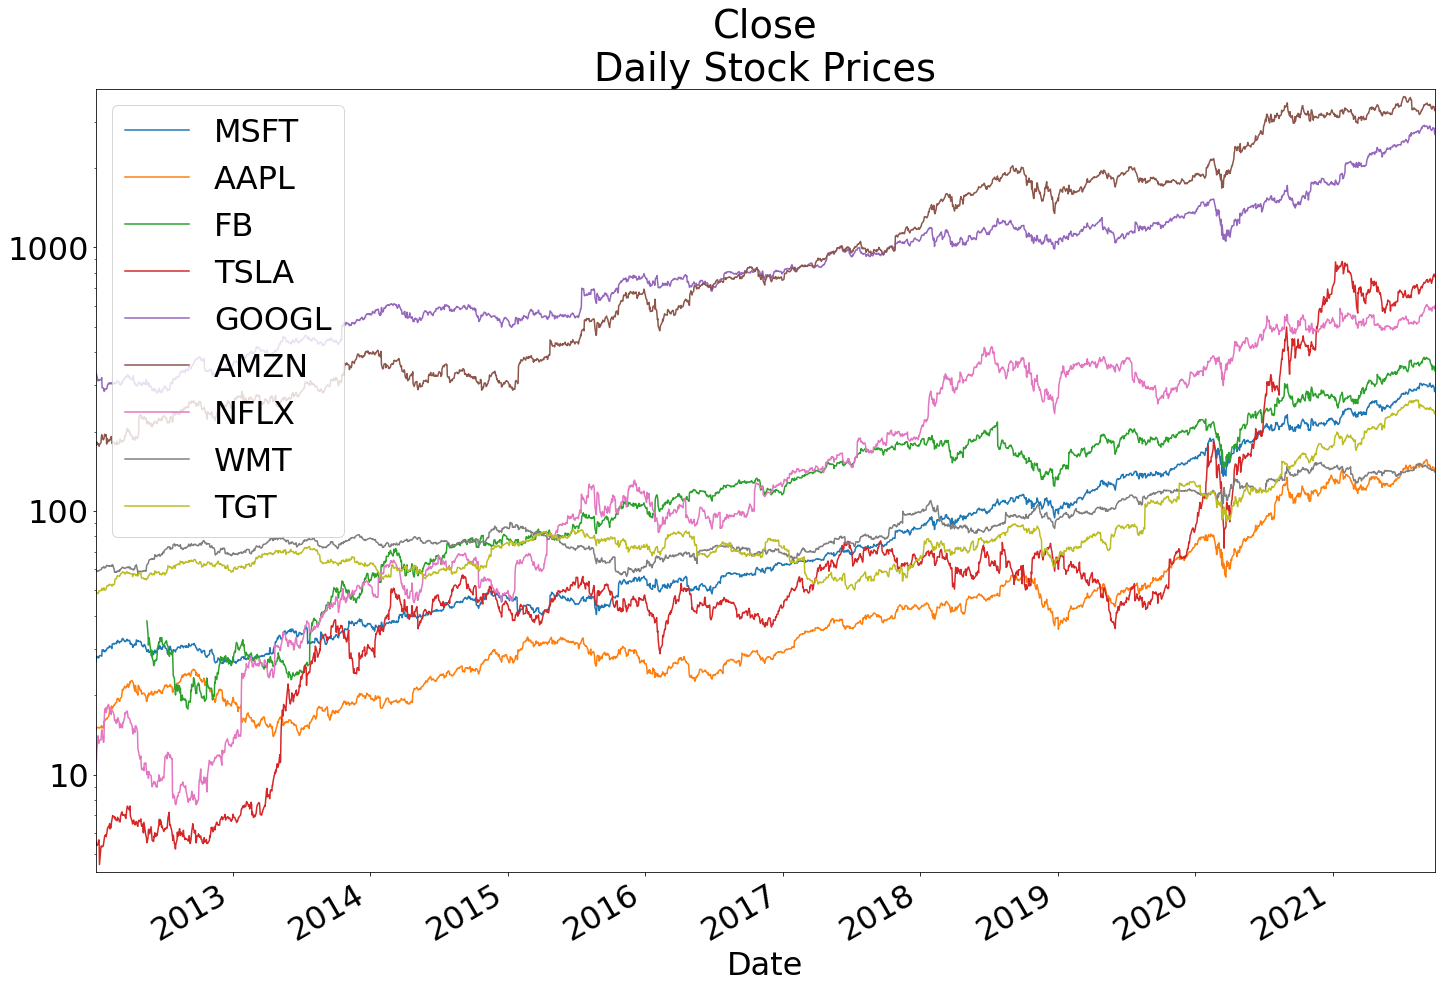

In [15]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01  
    
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices")
ax.set_yscale("log")
# reset y-ticklabels so that they are not in 
# scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

In [16]:
price_change_data = close_data.pct_change() * 100

<ipython-input-17-58c58f1ee5c9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


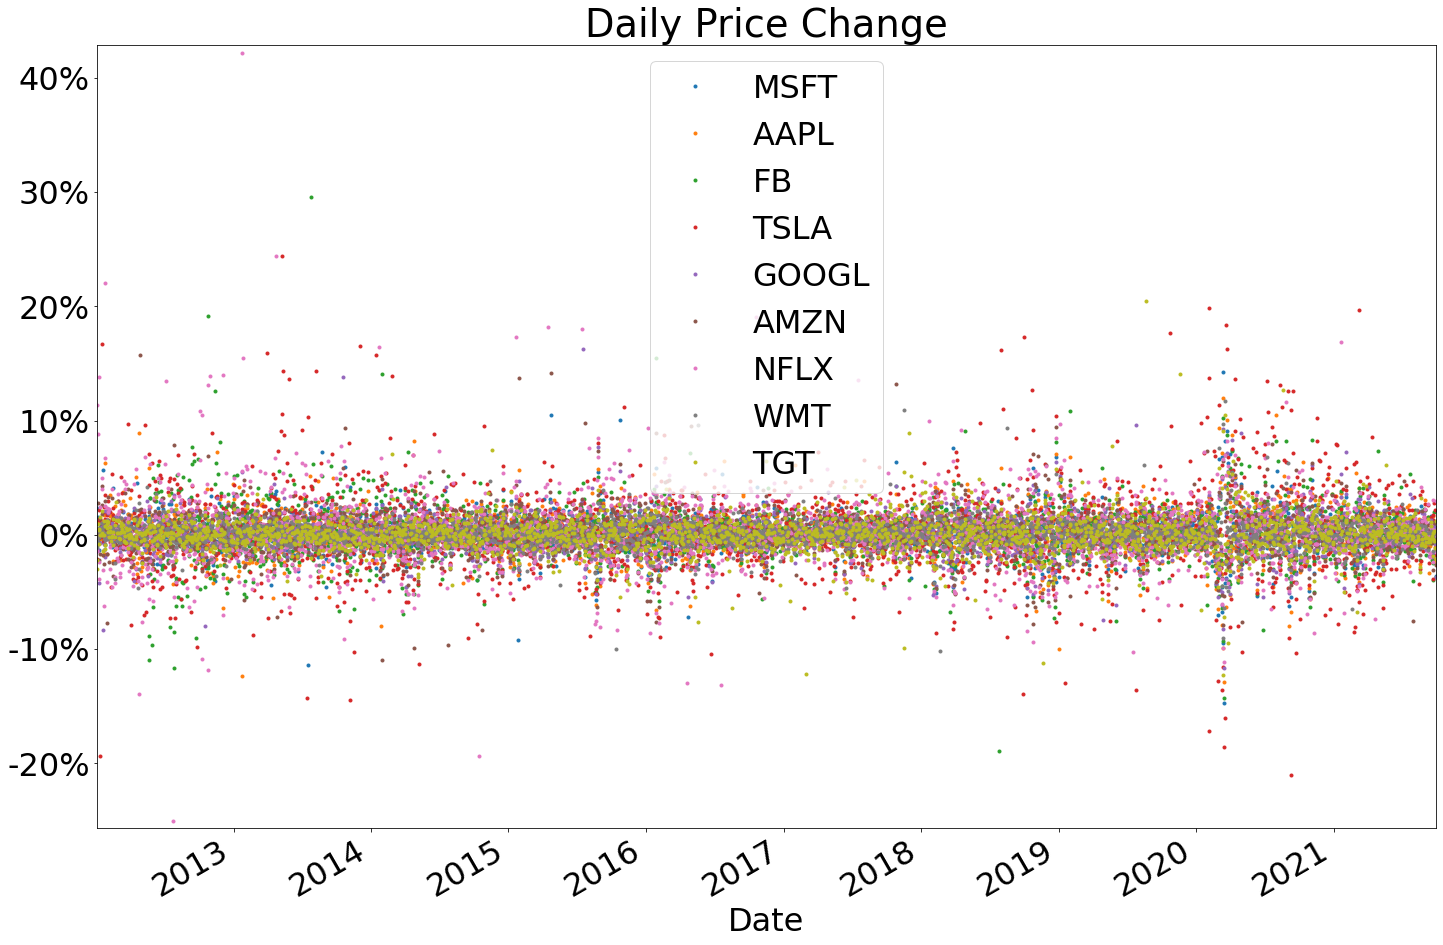

In [17]:
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

In [18]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

NameError: name 'gather_statistics' is not defined

In [19]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [21]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [22]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

,MSFT,AAPL,FB,TSLA,GOOGL,AMZN,NFLX,WMT,TGT
mean,0.109,0.109,0.119,0.262,0.098,0.137,0.210,0.042,0.076
median,0.069,0.081,0.105,0.131,0.094,0.114,0.061,0.039,0.079
variance,2.597,3.220,5.378,12.267,2.527,3.648,9.109,1.512,2.650
S.D.,1.612,1.794,2.319,3.502,1.590,1.910,3.018,1.229,1.628
skewness,0.045,-0.120,0.945,0.432,0.512,0.552,1.722,0.606,0.795
kurtosis,10.759,6.442,18.582,6.246,11.409,8.212,24.779,17.359,20.559


<ipython-input-23-0571c30e9031>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


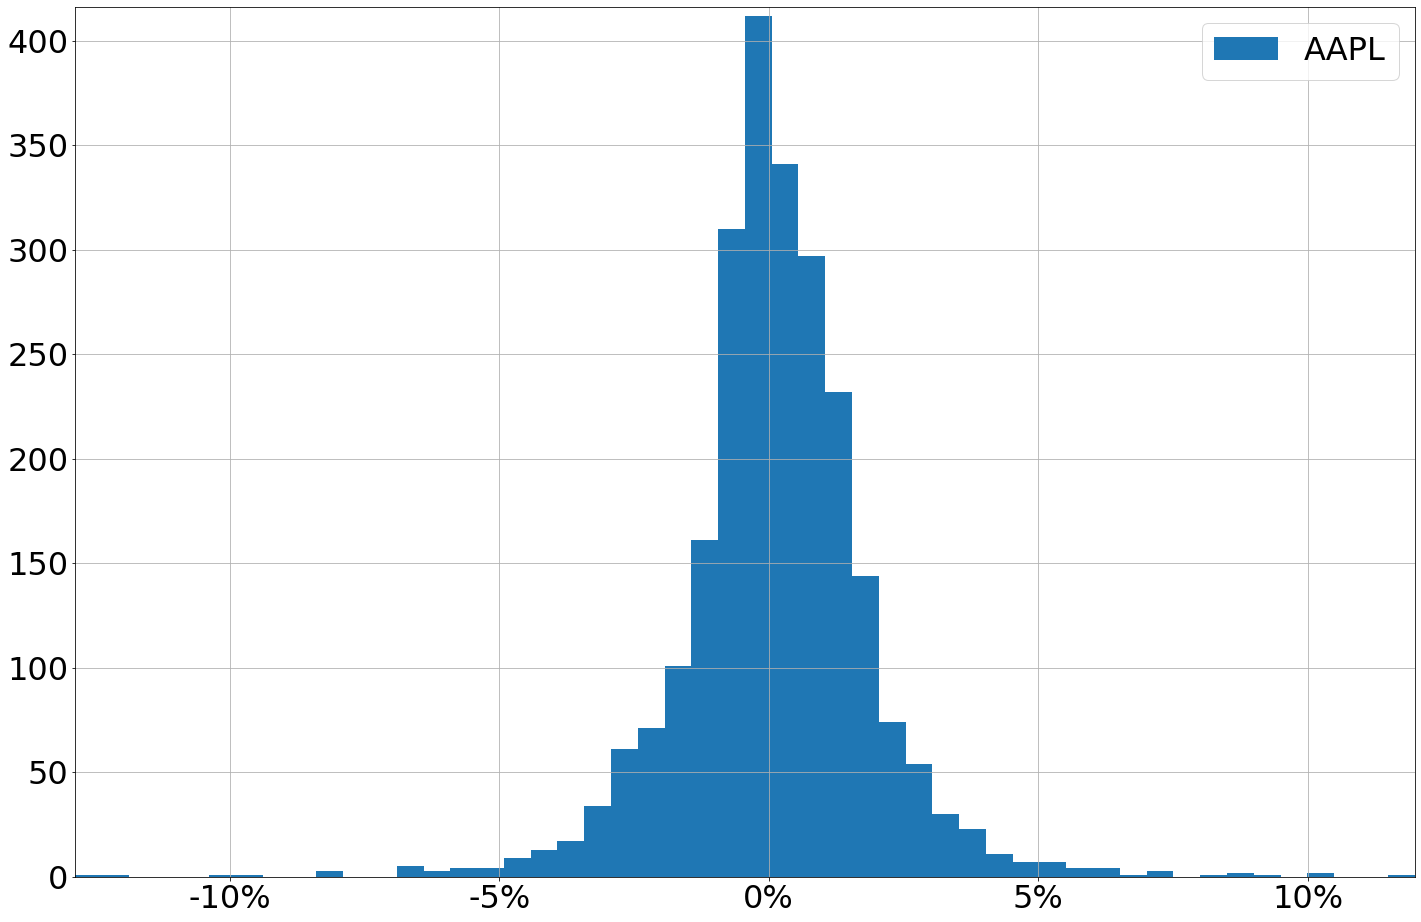

In [23]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()